In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

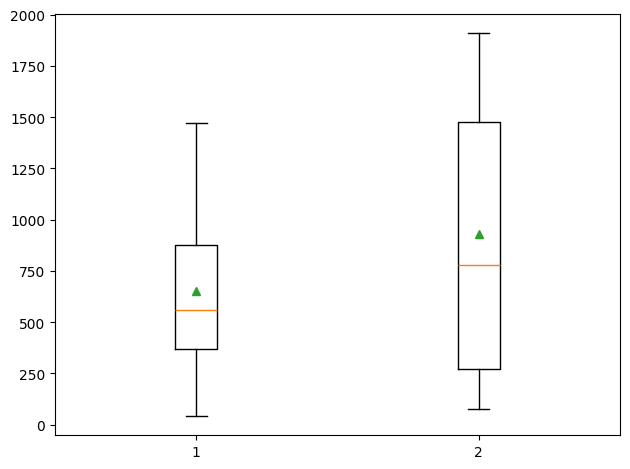

In [14]:
# Box Plot

a = np.random.randint(10,1500,25)
b = np.random.rand(25)
c = np.random.randint(5,2000,25)
d = c*b

fig, axis = plt.subplots()
#plotting code:
axis.boxplot(a,showmeans=True) # a parodo grafika, showmeans parodo vidurki
axis.boxplot(c,showmeans=True, positions=[2]) # postions atskiria rezultatus viena nuo kito, pozicija 2 pastumia i sali

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

# oranzinis bruksnelis yra mediana
# zalias trikampiukas- vidurkis

In [ ]:
a = np.random.randint(10,1500,25)
b = np.random.rand(25)
c = np.random.randint(5,2000,25)
d = c*b

fig, axis = plt.subplots()
#plotting code:
axis.boxplot(a,showmeans=True) # a parodo grafika, showmeans parodo vidurki
axis.boxplot(c,showmeans=True, positions=[2]) # postions atskiria rezultatus viena nuo kito, pozicija 2 pastumia i sali

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()